<a href="https://colab.research.google.com/github/thanhnhan311201/CS112.L21.KHCL/blob/main/Wecode/Assignment%204/SuaHangRao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Đề bài: Sửa Hàng Rào

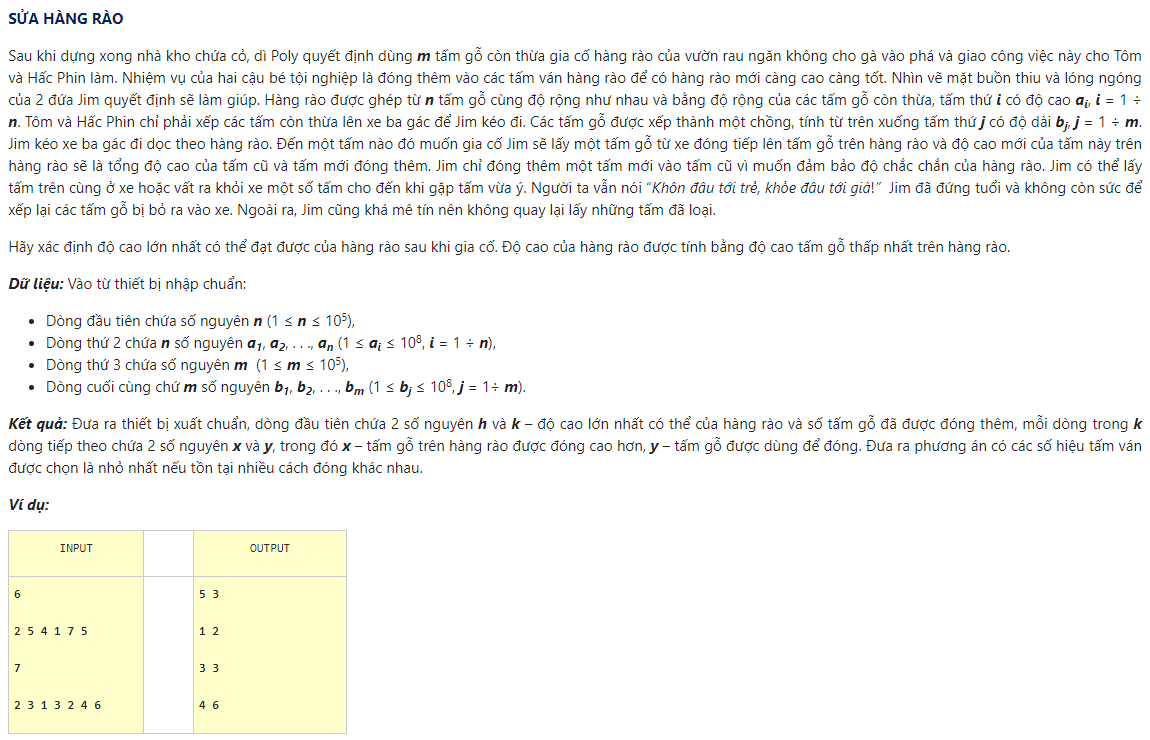

# Abstraction
* Ta có thể phát biểu lại bài toán như sau: 
    - Cho 2 số nguyên **n** (1 ≤ **n** ≤ 10^5), **m**  (1 ≤ **m** ≤ 10^5)
    - 2 dãy số **a**1, **a**2, . . ., **an** (1 ≤ **ai** ≤ 10^8, **i** = 1 ÷ **n**), và **b**1, **b**2, . . ., **bm** (1 ≤ **bj** ≤ 108, **j** = 1÷ **m**)

    - Tìm và in ra **h**, **k** cặp (**i, j**) sao cho các cặp (**i, j**) tăng dần và phần tử nhỏ nhất của dãy a (**h**) sau khi cộng dồn **bj** cho **ai** là lớn nhất.
    - Nếu có nhiều cách chọn, hãy chọn cách có **j** là nhỏ nhất.

# Pattern Recconigtion
* Dạng bài toán: Tối ưu hoá.
* Hướng tiếp cận: Tìm kiếm nhị phân.
* Đặc điểm nhận biết: Tìm một số nguyên.

# Ý tưởng:
 - Ta cần 1 hàm **Try** kiểm tra liệu với 1 số **h** nào đó, để từ dãy **a** và **b** có thể làm cho dãy **a** đạt **max_height** = **h** được hay không. Nếu có trả về **True**, nếu không trả về **False**.
 - Tiếp theo ta dùng thuật toán tìm kiếm nhị phân để chọn ra các số h để đưa vào hàm **Try** và thử.

# Algorithm designed
* Bước 1: Khởi tạo các giá trị cho vòng lặp tìm kiếm nhị phân
    - **left** = 0
    - **right** = 2*10^8 + 1
* Bước 2: Lặp cho đến khi **left < right** 
  - **mid = (left + right)//2**
  - Nếu **Try(mid) == True** thì cập nhật **left = mid + 1** để tìm xem còn giá trị chiều cao **h** tốt hơn không
  - ngược lại: **right = mid** để giới hạn phạm vi tìm kiếm
* Bước 3: Gán **h = left - 1** (giá trị mà hàm **Try** trả về **True** cuối cùng sau khi duyệt tìm kiếm nhị phân - giá trị chiều cao lớn nhất tìm được)
* Bước 4: Xuất kết quả với chiều cao vừa **h** tìm được

# Time complexity
* Trong trường hợp xấu nhất độ phức tạp thời gian là **O(M.log(M))** với **M** là **Max(n,m)**.

In [1]:
# Hàm Try dùng để kiểm tra từ dãy a và b có thể đạt tới giá trị h hay không
def Try(n, m ,a ,b , h):
    # Giữ lại các phần tử nhỏ hơn h của dãy a
	ta = [x for x in a if x < h]
	n_ta = len(ta)
	i=0
    # Nếu không có phần tử nào nhỏ hơn h thì trả về True
	if n_ta == 0:
		return True
    # Duyệt vòng lặp
	for bj in b:
		if ta[i] + bj >= h: # Nếu các phần tử của a sau khi cộng với các phần tử của b lớn hơn hoặc bằng h thì tăng biến đếm i lên 1
			i += 1
		if i == n_ta:       # Nếu tất cả phần tử nhỏ hơn  h của a đều đã lớn hơn hoặc bằng h thì trả về True
			return True
	return False            # Ngược lại sau khi đã duyệt hết các phần tử của b thì Trả về False

# Hàm in kết quả sau với chiều cao h, cách duyệt tương tự như hàm Try
def PrintResult(n, m ,a ,b , h):
	ta = [ x for x in range(n) if a[x] < h]
	n_ta = len(ta)
	i=0
	j=0	
	temp_result= ''
	if n_ta == 0:
		return '',0
	for j in range(m):
		if a[ta[i]] + b[j] >= h:
			temp_result += str(ta[i]+1) +' '+ str(j+1) + '\n'
			i += 1
		if i == n_ta:
			return temp_result,n_ta

# hàm main
def main():
    # Nhập các giá trị đầu vào
	n = int(input())
	a = [int(i) for i in input().split()]
	m = int(input())
	b = [int(i) for i in input().split()]
    # Khởi tạo các giá trị ban đầu
	left = 0
	right = 200000001
	h = 0
	k = 0
	kab = 0
    # Bắt đầu vòng lặp tìm kiếm nhị phân
	while(left < right):
		mid = (left+right)//2
		try_ = Try(n,m,a,b,mid)
		if try_==True:          # Nếu try_ trả về True thì cập nhật left bằng mid + 1 để tìm xem có số h tiếp theo tốt hơn không
			left = mid + 1
		else:
			right = mid         # Ngược lại cập nhật right = mid để thu hẹp phạm vi tìm kiếm
	h = left - 1                # Chiều cao lon71 nhất tìm được
    # Xuất kết quả ra màn hình
	kab, k = PrintResult(n,m,a,b,h)
	print(h,k)
	print(kab)
 
main()

6
2 5 4 1 7 5
7
2 3 1 3 2 4 6
5 3
1 2
3 3
4 6

